In [25]:
#Kevin Madden 
#Due Date: 2/14/2022
#Professor: Dr. Hamed Tabkhi, PH.D.

import torch
from PIL import Image
from torchvision import transforms
import requests
from io import BytesIO
import numpy as np
import torch.optim as optim

#checking if I have GPU connected
torch.cuda.is_available()

True

In [26]:
#3.A
import csv
housing_path = "https://raw.githubusercontent.com/kmadden9/realTimeML/main/Housing_fixed.csv"
house_numpy = np.loadtxt(housing_path, dtype=np.float32, delimiter=",", skiprows=1)
house_numpy

array([[1.330e+07, 7.420e+03, 4.000e+00, 2.000e+00, 3.000e+00, 2.000e+00],
       [1.225e+07, 8.960e+03, 4.000e+00, 4.000e+00, 4.000e+00, 3.000e+00],
       [1.225e+07, 9.960e+03, 3.000e+00, 2.000e+00, 2.000e+00, 2.000e+00],
       ...,
       [1.750e+06, 3.620e+03, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.750e+06, 2.910e+03, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.750e+06, 3.850e+03, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00]],
      dtype=float32)

In [27]:
col_list = next(csv.reader(open('/content/raw.githubusercontent.com/kmadden9/realTimeML/main/Housing_fixed.csv'), delimiter=','))
house_numpy.shape, col_list

((545, 6), ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'])

In [28]:
house = torch.from_numpy(house_numpy)
house.shape, house.dtype

(torch.Size([545, 6]), torch.float32)

In [29]:
data = house[:, 1:]
data, data.shape

(tensor([[7.4200e+03, 4.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00],
         [8.9600e+03, 4.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00],
         [9.9600e+03, 3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00],
         ...,
         [3.6200e+03, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00],
         [2.9100e+03, 3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00],
         [3.8500e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00]]),
 torch.Size([545, 5]))

In [30]:
target = house[:, 0]
target, target.shape

(tensor([13300000., 12250000., 12250000., 12215000., 11410000., 10850000.,
         10150000., 10150000.,  9870000.,  9800000.,  9800000.,  9681000.,
          9310000.,  9240000.,  9240000.,  9100000.,  9100000.,  8960000.,
          8890000.,  8855000.,  8750000.,  8680000.,  8645000.,  8645000.,
          8575000.,  8540000.,  8463000.,  8400000.,  8400000.,  8400000.,
          8400000.,  8400000.,  8295000.,  8190000.,  8120000.,  8080940.,
          8043000.,  7980000.,  7962500.,  7910000.,  7875000.,  7840000.,
          7700000.,  7700000.,  7560000.,  7560000.,  7525000.,  7490000.,
          7455000.,  7420000.,  7420000.,  7420000.,  7350000.,  7350000.,
          7350000.,  7350000.,  7343000.,  7245000.,  7210000.,  7210000.,
          7140000.,  7070000.,  7070000.,  7035000.,  7000000.,  6930000.,
          6930000.,  6895000.,  6860000.,  6790000.,  6790000.,  6755000.,
          6720000.,  6685000.,  6650000.,  6650000.,  6650000.,  6650000.,
          6650000.,  6650

In [31]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([5.1505e+03, 2.9651e+00, 1.2862e+00, 1.8055e+00, 6.9358e-01])

In [32]:
data_var = torch.var(data, dim=0)
data_var

tensor([4.7095e+06, 5.4474e-01, 2.5248e-01, 7.5254e-01, 7.4233e-01])

In [33]:
target_mean = torch.mean(target, dim=0)
target_mean

tensor(4766729.5000)

In [34]:
target_var = torch.var(target, dim=0)
target_var

tensor(3.4985e+12)

In [35]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.0458,  1.4021,  1.4205,  1.3770,  1.5163],
        [ 1.7554,  1.4021,  5.4008,  2.5297,  2.6769],
        [ 2.2162,  0.0472,  1.4205,  0.2242,  1.5163],
        ...,
        [-0.7053, -1.3077, -0.5697, -0.9285, -0.8050],
        [-1.0324,  0.0472, -0.5697, -0.9285, -0.8050],
        [-0.5993,  0.0472, -0.5697,  0.2242, -0.8050]])

In [36]:
target_normalized = (target - target_mean) / torch.sqrt(target_var)
target_normalized

tensor([ 4.5622e+00,  4.0008e+00,  4.0008e+00,  3.9821e+00,  3.5517e+00,
         3.2523e+00,  2.8781e+00,  2.8781e+00,  2.7284e+00,  2.6910e+00,
         2.6910e+00,  2.6273e+00,  2.4290e+00,  2.3916e+00,  2.3916e+00,
         2.3167e+00,  2.3167e+00,  2.2419e+00,  2.2044e+00,  2.1857e+00,
         2.1296e+00,  2.0922e+00,  2.0735e+00,  2.0735e+00,  2.0360e+00,
         2.0173e+00,  1.9762e+00,  1.9425e+00,  1.9425e+00,  1.9425e+00,
         1.9425e+00,  1.9425e+00,  1.8863e+00,  1.8302e+00,  1.7928e+00,
         1.7719e+00,  1.7516e+00,  1.7179e+00,  1.7086e+00,  1.6805e+00,
         1.6618e+00,  1.6431e+00,  1.5682e+00,  1.5682e+00,  1.4934e+00,
         1.4934e+00,  1.4747e+00,  1.4560e+00,  1.4372e+00,  1.4185e+00,
         1.4185e+00,  1.4185e+00,  1.3811e+00,  1.3811e+00,  1.3811e+00,
         1.3811e+00,  1.3774e+00,  1.3250e+00,  1.3063e+00,  1.3063e+00,
         1.2688e+00,  1.2314e+00,  1.2314e+00,  1.2127e+00,  1.1940e+00,
         1.1566e+00,  1.1566e+00,  1.1378e+00,  1.1

In [37]:
area = torch.stack(tuple(data_normalized[:,0]))
bedrooms = torch.stack(tuple(data_normalized[:,1]))
bathrooms = torch.stack(tuple(data_normalized[:,2]))
stories = torch.stack(tuple(data_normalized[:,3]))
parking = torch.stack(tuple(data_normalized[:,4]))
parking.size()

torch.Size([545])

In [38]:
def model(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b):
  return w5 * area + w4 * bedrooms + w3 * bathrooms + w2 * stories + w1 * parking + b

In [39]:
def loss_fn(price_pred, target_normalized):
  squared_diffs = (price_pred - target_normalized)**2
  return squared_diffs.mean()

In [40]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [41]:
price_pred = model(area, bedrooms, bathrooms, stories, parking, *params)
loss = loss_fn(price_pred, target_normalized)

loss.backward()
optimizer.step()

params

tensor([9.9997e-01, 9.9997e-01, 9.9997e-01, 9.9997e-01, 9.9998e-01, 3.0920e-12],
       requires_grad=True)

In [42]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

price_pred = model(area, bedrooms, bathrooms, stories, parking, *params)
loss = loss_fn(price_pred, target_normalized)
optimizer.zero_grad()

loss.backward()
optimizer.step()

params

tensor([9.7343e-01, 9.7118e-01, 9.6898e-01, 9.6592e-01, 9.7511e-01, 3.0920e-09],
       requires_grad=True)

In [43]:
def training_loop(n_epochs, optimizer, params, area, bedrooms, bathrooms, stories, parking, target_normalized):
  for epoch in range(1, n_epochs + 1):
    price_pred = model(area, bedrooms, bathrooms, stories, parking, *params)
    loss = loss_fn(price_pred, target_normalized)
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  
  return params

In [50]:
#2.b
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = .00001
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
  n_epochs = 5000,
  optimizer = optimizer,
  params = params,
  area =area,
  bedrooms =bedrooms,
  bathrooms =bathrooms,
  stories =stories,
  parking =parking,
  target_normalized = target_normalized)

Epoch 500, Loss 5.836338
Epoch 1000, Loss 5.634282
Epoch 1500, Loss 5.439825
Epoch 2000, Loss 5.252674
Epoch 2500, Loss 5.072558
Epoch 3000, Loss 4.899212
Epoch 3500, Loss 4.732380
Epoch 4000, Loss 4.571817
Epoch 4500, Loss 4.417286
Epoch 5000, Loss 4.268562


tensor([8.7817e-01, 8.6906e-01, 8.5957e-01, 8.4481e-01, 8.8679e-01, 1.2088e-08],
       requires_grad=True)

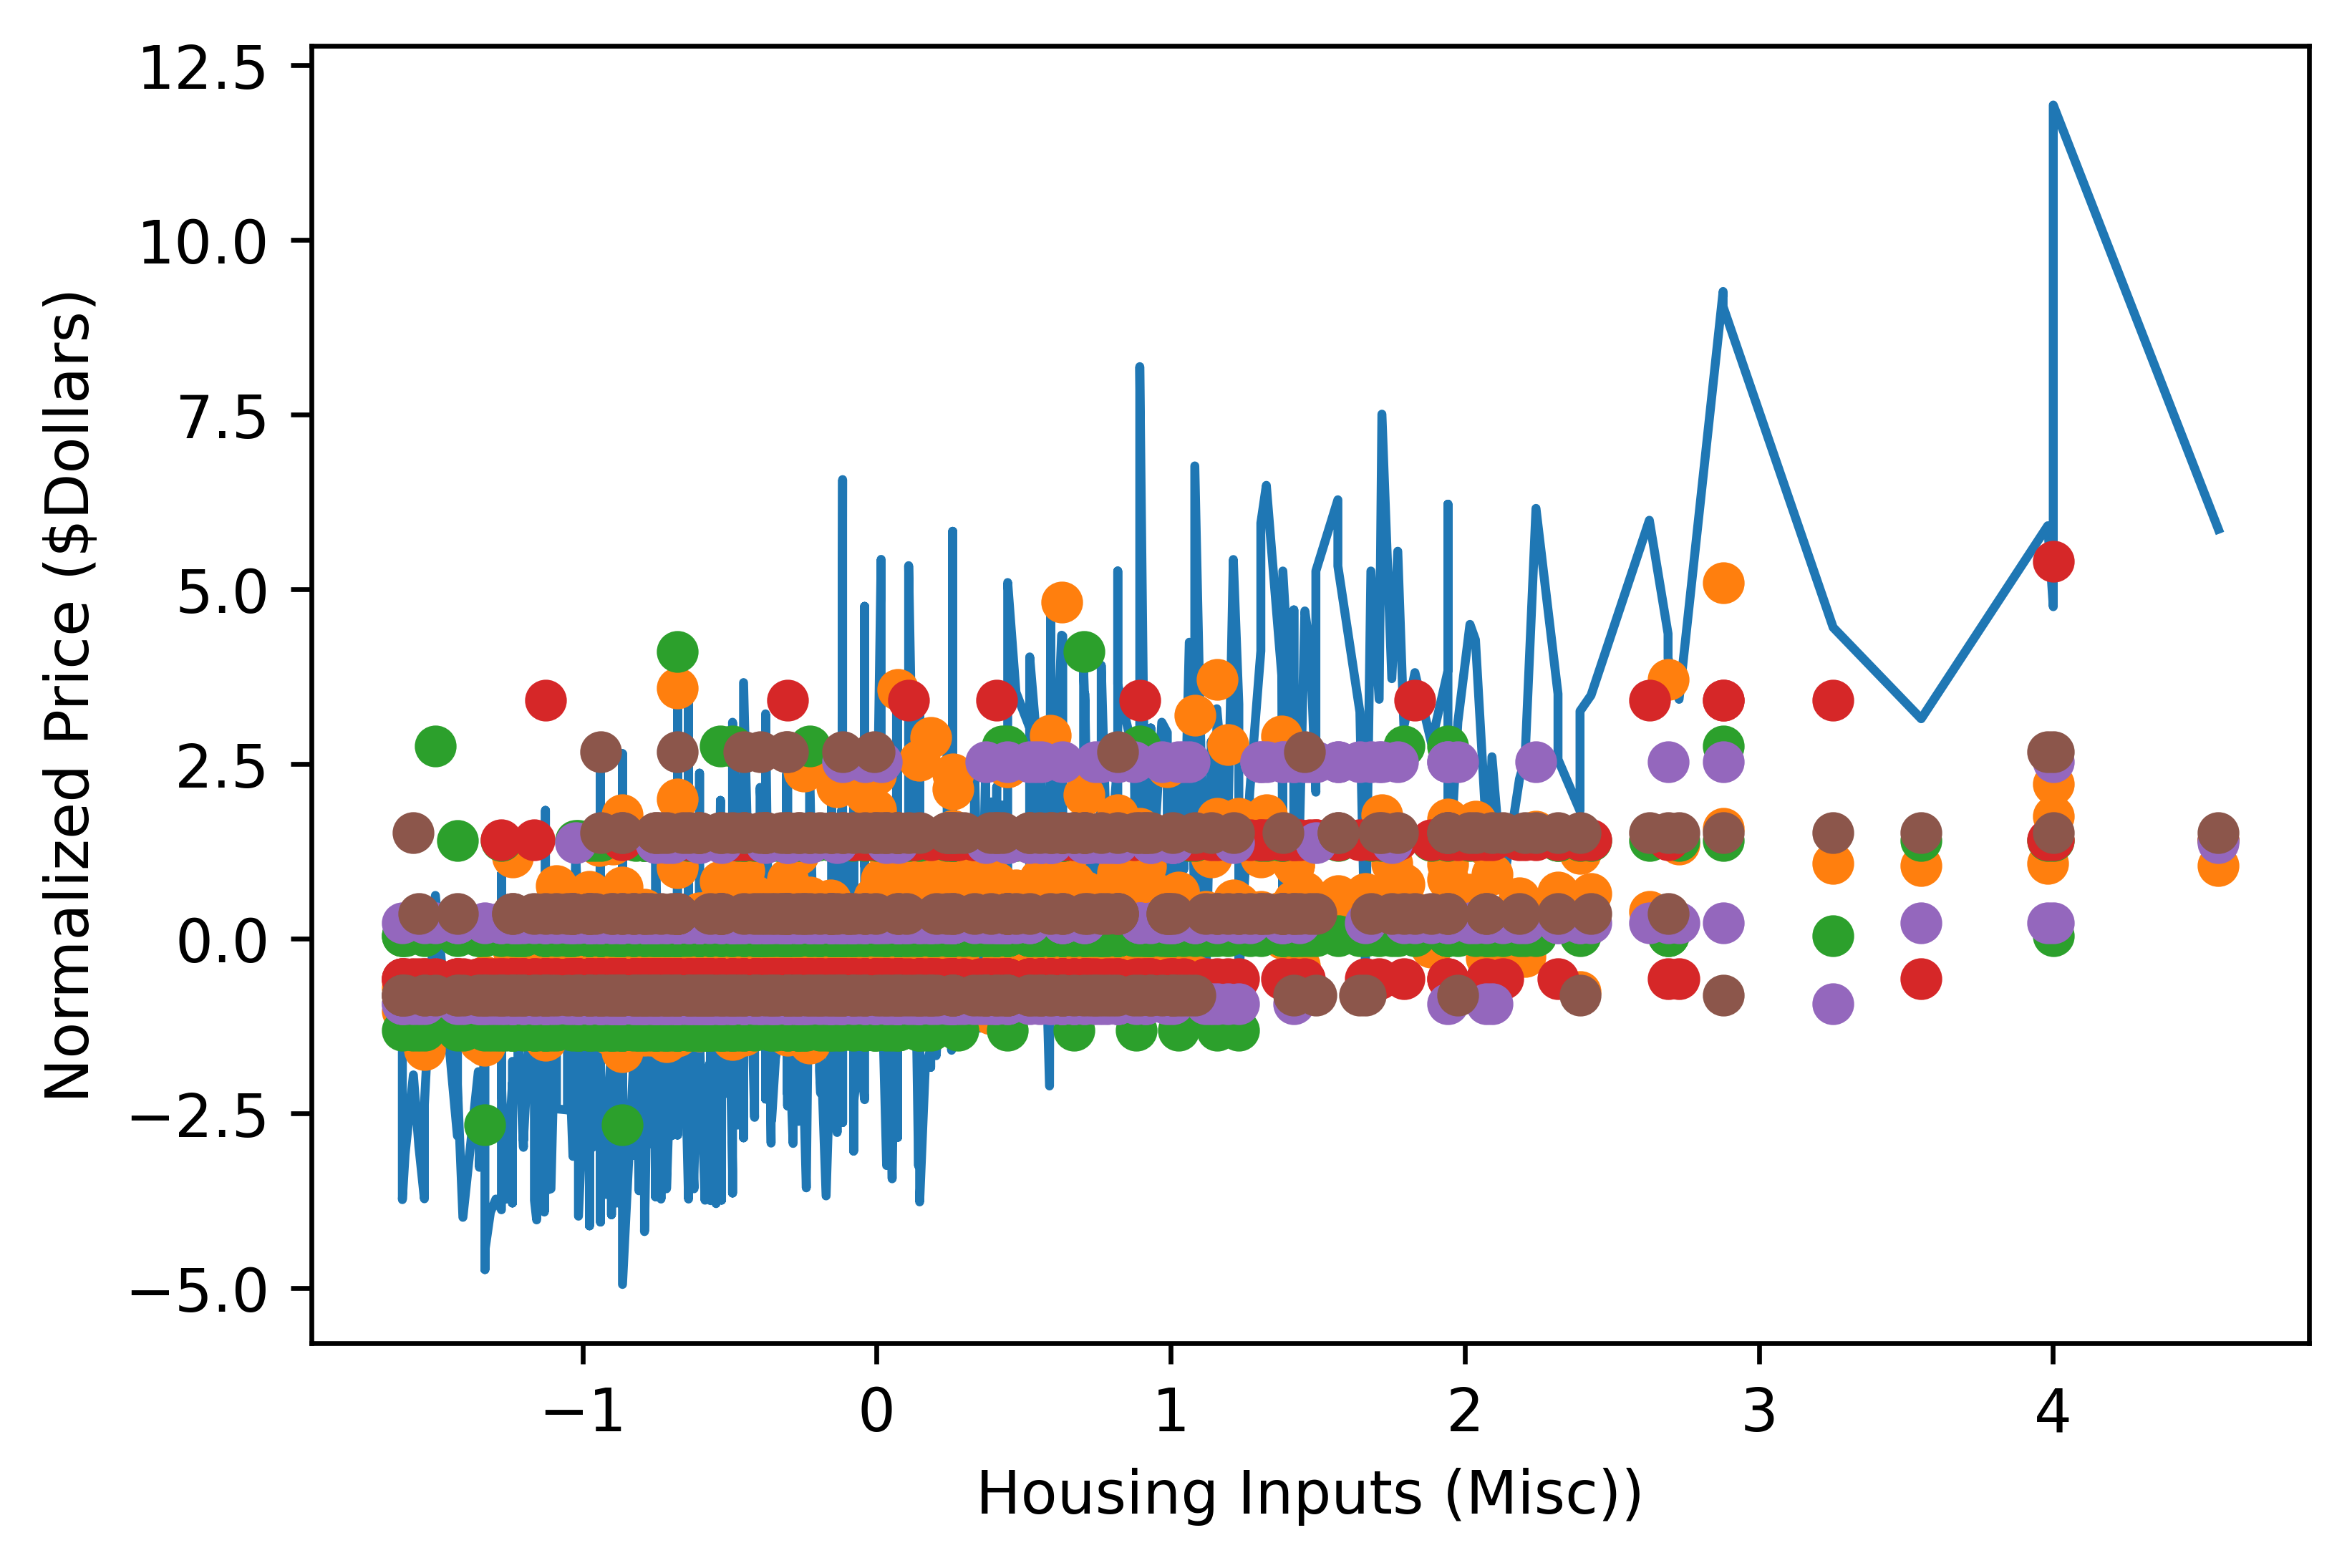

In [52]:
from re import X
%matplotlib inline
from matplotlib import pyplot as plt
price_pred = model(area, bedrooms, bathrooms, stories, parking, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Housing Inputs (Misc))")
plt.ylabel("Normalized Price ($Dollars)")
plt.plot(target_normalized.numpy(), price_pred.detach().numpy())
plt.plot(target_normalized.numpy(), data_normalized.numpy(), 'o')